# Predict Red Wine Quality

![red_wine](images/red_wine.jpg)

## Introduction to the dataset
### Start with reading the file

In [1]:
# Import the library needed to read the file
import pandas as pd

In [2]:
# Read the file using the relative path
data = pd.read_csv(filepath_or_buffer="data/wine_quality.csv")

### Take a look at the datset and check its dimensions

In [3]:
# Look at the first five rows
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Look at the five last rows
data.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Check the dimension of the dataset
data.shape

(1599, 12)

### Understand the data

* __fixed_acidity__: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* __volatile_acidity__: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinerger taste
* __citric_acid__: found in small quantities, citric acid can add 'freshness' and flavor to wines
* __residual_sugar__: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter. Wines with greater than 45 grams/liter are considered sweet.
* __chlorides__: the amount of salt in the wine. (chlorides > 0.06 is considered salty)
* __free_sulfur_dioxide__: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
* __total_sulfur_dioxide__: amount of free and bound forms of SO2; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentration over 50 ppm, SO2, becomes evident in the nose and taste of wine. 
* __density__: wine density (density > 1 means fermentation is not over)
* __pH__: describe how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. (pH scale is lograitmic, which means pH=6 is 10 times more acid than pH=7)
* __sulphates__: a wine additive which can contribute to sulfur dioxide gas (SO2) levels, which acts as an antimicrobial and antioxidant
* __alcohol__: the percent alcohol content of the wine. (alcohol < 10 is considered weak)
* __quality__: output variable (based on sensory data, score between 0 and 10)

#### What are the features?

In [6]:
# print the name of the eleven features
data.columns[:11]

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

#### What is the response?

In [7]:
# print the name of the response
data.columns[11]

'quality'

### Let's dig a bit more into the numbers

In [8]:
# Use the Pandas built-in function describe() on the DataFrame.
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### What kind of additional information can be retrieved from the DataFrame?

* __residual_sugars__: the wines are not very sweet (i.e. residual_sugars < 45)
* __chlorides__: the wines are really salty (i.e. chlorides > 0.06)
* __density__: the fermentation is not over for some wines (i.e. density > 1)
* __pH__: some wines are much more acid than the others
* __alcohol__: some wines are really weak (i.e. alcohol < 10)

### How is the quality distribution of the red wines?

In [9]:
# Import the library needed to plot
import seaborn as sns

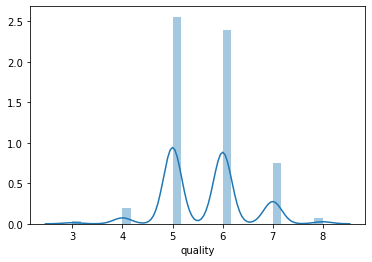

In [10]:
# Plot a histogram of the red wine quality (https://seaborn.pydata.org/generated/seaborn.distplot.html)
hist = sns.distplot(data['quality'])

#### What conclusions can be drawn from the plot?

Most of the wines are rated between 5-7. There are no wines in the dataset that have the worst nor the best quality.

## Visualize the data
In the previous notebook, we used scatterplots to visualise the relationship between the features and the response. We could do it again for this dataset, but since we have many more features a correlation plot may be easier to work with.

__Correlation__ is a way to measure how strong the relationship between two variables are. The correlation value can range between -1 and 1:

* -1: Perfect negative correlation
* 1: Perfect positive correlation
* 0: No relationship between the variables

In [11]:
# Use the built-in function corr() provided by Pandas to compute the correlation between all the variables
corr_matrix = data.corr()
corr_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


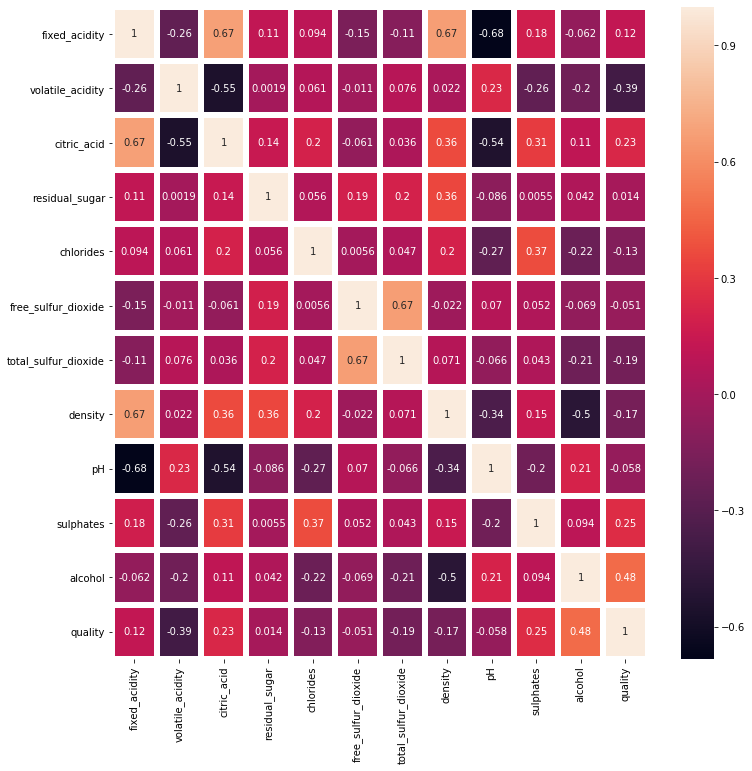

In [12]:
# Use a heatmap to visualize the result in the correlation matrix (https://seaborn.pydata.org/generated/seaborn.heatmap.html)
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,12)) # This line is used to increase the size of the heatmap figure

corr_heatmap = sns.heatmap(data=corr_matrix, annot=True, linewidth=5)

* __annot__: if True, write the data value in each cell
* __linewidth__: width of the lines that will divide each cell.

#### Do we have to include all features in the following steps? Which features are more correlated with the response?

## Exercise
Now when we have a better understanding of the dataset it is time to prepare the input, select a model, train it and then predict the quality of red wine on a scale of 0-10.

## Prepare feature matrix "X" and response vector "y"

In [13]:
# create a Python list of the features you want to include
feature_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol']



In [14]:
# use the list to select a subset of the original DataFrame
X = data[feature_cols]

In [15]:
# print the first 5 rows
X.head()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4


In [16]:
# select the response vector from the DataFrame
y = data['quality']

In [17]:
# print the first 5 values
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Follow the following procedure

1. Split the dataset into two pieces: a __training set__ and a __testing set__.
2. Train the model on the __training set__.
3. Test the model on the __testing set__, and evaluate how well we did.

### Step 1: Split the dataset into two pieces: a __training_set__ and a __testing_set__

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(1279, 8)
(320, 8)


In [20]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(1279,)
(320,)


### Step 2: Train the model with linear regression on the training set

__Step 1:__ Import the class (model) you want to use

In [21]:
from sklearn.linear_model import LinearRegression

__Step 2:__ "Instantiate" the "estimator"

In [22]:
linreg = LinearRegression()

__Step 3:__ Fit the model with the training data (aka "model training")

In [23]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Intepreteing the model coefficients

In [24]:
# Print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

41.55353766435948
[ 7.01684561e-02 -1.18393215e+00 -2.91630680e-01 -1.50001499e+00
 -1.87451378e-03 -3.90458243e+01  9.20508518e-01  2.63368573e-01]


In [25]:
# Pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('fixed_acidity', 0.07016845607856874),
 ('volatile_acidity', -1.1839321469545827),
 ('citric_acid', -0.29163068008266985),
 ('chlorides', -1.5000149893916241),
 ('total_sulfur_dioxide', -0.0018745137800529877),
 ('density', -39.04582427040664),
 ('sulphates', 0.9205085177894994),
 ('alcohol', 0.26336857265703656)]

__Step 4:__ Predict the response (sales) on the testing set

In [26]:
y_pred = linreg.predict(X_test)

## Step 3: Test the model on the testing set, and evaluate how well we did

In [31]:
# Import the library needed to evaluate the testing set
from sklearn import metrics
import numpy as np

In [32]:
# Compute the MAE
print(metrics.mean_absolute_error(y_test, y_pred))

0.4810597082815028


The average error between the actual and predicted quality score is around 0.5. 

In [33]:
# Compute the MSE
print(metrics.mean_squared_error(y_test, y_pred))

0.3838155647384155


In [34]:
# Compute the RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.6195285019580742


#### What conclusion can be drawn from the evaluation metrics?

The predictions are fine since we are predicting on a scale from 1-10, the error is acceptable.

## Repeat the procedure, but this time with cross-validation

In [35]:
# Import the library needed for cross-validation
from sklearn.model_selection import cross_val_score

Compute the RMSE using cross-validation

In [36]:
# Compute the negative MSE
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-0.46768728 -0.38079546 -0.47465263 -0.43350951 -0.36497105 -0.52968231
 -0.4035162  -0.42014656 -0.36294206 -0.49981229]


In [37]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[0.46768728 0.38079546 0.47465263 0.43350951 0.36497105 0.52968231
 0.4035162  0.42014656 0.36294206 0.49981229]


In [38]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[0.68387665 0.61708627 0.68895039 0.65841439 0.60412834 0.72779276
 0.63522925 0.64818714 0.60244673 0.70697404]


In [39]:
# calculate the average RMSE
print(rmse_scores.mean())

0.6573085949680846


## Want to explore more?

Here are some suggestions:

* Try with a different combination of features
* Try other datasets
* Try some feature engineering (create your own features)
* Try new models